# Assignment Purpose

In this assignment, we will analyze a dataset using the built-in parts of Python3.  
You should only use Python3 built-in modules (i.e. do not import pandas etc.).  
"Built-ins" refer to functions, module, keywords etc. that are packaged with Python3.  
Refer to https://docs.python.org/3/library/ if you are unsure what is included.

The dataset we chose is taken from kaggle's open data:

https://www.kaggle.com/osmi/mental-health-in-tech-survey

We will distribute the survey.csv file so you don't have to download the dataset.  
Take a look at the dataset description to understand the semantics of the different columns.

## Uploading the data

The first thing you should do is upload the csv file to your collaboratory instance. You can do this by **one** of the following methods (dont do both):
1. Using the colab UI  


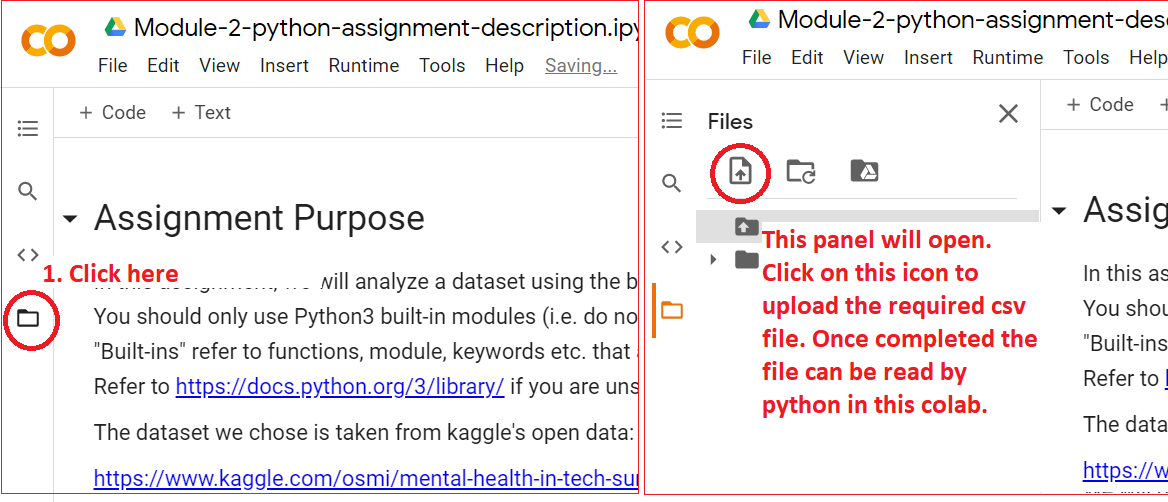

When the above step is complete, you should see the file that you chose on the left panel. 

2. The above step using code.

In [13]:
# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [15]:
upload_files()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Mandatory Tasks

### Task 1

Use the `csv` built-in module to read the survey.csv file:

https://docs.python.org/3/library/csv.html

You can do any preprocessing or set up any data structures you want to use to do the rest of the tasks.

In [16]:
import csv
f=open("survey.csv", "r")
survey_reader = csv.reader(f, delimiter=",")
type(survey_reader)

_csv.reader

In [17]:
import csv
f=open("survey.csv", "r")
survey_reader = csv.reader(f, delimiter=",")
data_list = list(survey_reader)


**Recommended:**

We recommend that you set up some data structures to make working with the data set easier. There are different ways of solving this problem, this is just what we advise. We recommend creating a list of [dictionaries](https://www.w3schools.com/python/python_dictionaries.asp). Each dictionary represents a line in the data file. Each dictionary maps a column name to a value. Set up this data structure below and use it in the other tasks:


In [19]:
import csv
f=open("survey.csv", "r")
survey_reader = csv.reader(f, delimiter=",")
data_list = list(survey_reader)

lines = []
header = data_list[0]
for cur_line in data_list[1:]:
  new_line = {}
  for i in range(len(cur_line)):
    cur_header = header[i]
    cur_value = cur_line[i]
    new_line[cur_header] = cur_value
  lines.append(new_line)



In [22]:
lines[0]

{'Age': '37',
 'Country': 'United States',
 'Gender': 'Female',
 'Timestamp': '2014-08-27 11:29:31',
 'anonymity': 'Yes',
 'benefits': 'Yes',
 'care_options': 'Not sure',
 'comments': 'NA',
 'coworkers': 'Some of them',
 'family_history': 'No',
 'leave': 'Somewhat easy',
 'mental_health_consequence': 'No',
 'mental_health_interview': 'No',
 'mental_vs_physical': 'Yes',
 'no_employees': '6-25',
 'obs_consequence': 'No',
 'phys_health_consequence': 'No',
 'phys_health_interview': 'Maybe',
 'remote_work': 'No',
 'seek_help': 'Yes',
 'self_employed': 'NA',
 'state': 'IL',
 'supervisor': 'Yes',
 'tech_company': 'Yes',
 'treatment': 'Yes',
 'wellness_program': 'No',
 'work_interfere': 'Often'}

In [23]:
family_hist_values = []
count = 0
for line in lines:
  if line['family_history']=="Yes":
    count += 1
print(count)

492


### Task 2

Report the percentage of respondant who work at companies with more than 1000 employees.

The result should be formatted and printed with a formatted string. Percentages should include 1 decimal point.

Hint: 
- Clearly look at the columns in the dataset and what values it can have.

In [24]:
No_of_empl = {}

for line in lines:
  if line['no_employees'] in No_of_empl:
    No_of_empl[line['no_employees']] += 1
  else:
    No_of_empl[line['no_employees']] = 1
    

Used the same script as from exercise 3 to find types of entry in Number of employees field.

In [25]:
No_of_empl

{'1-5': 162,
 '100-500': 176,
 '26-100': 289,
 '500-1000': 60,
 '6-25': 290,
 'More than 1000': 282}

1259

In [32]:
total_number_of_entries = sum(list(No_of_empl.values()))
entries_More_than_1000 = No_of_empl['More than 1000']

print("The percentage of respondant who work at companies with more than 1000 employees is {:.1f} %".format(entries_More_than_1000/total_number_of_entries * 100))


The percentage of respondant who work at companies with more than 1000 employees is 22.4 %


### Task 3

How many self employeed respondants are in California? You must use the "and" boolean operator.

Checking possible states and self employed values first:

In [33]:
states_values = []
self_employed_values = []
for line in lines: 
  states_values.append(line['state'])
  self_employed_values.append(line['self_employed'])
print(set(states_values))
print(set(self_employed_values))

{'SD', 'UT', 'DC', 'AZ', 'CT', 'MN', 'WI', 'WV', 'CA', 'NH', 'KS', 'OR', 'KY', 'FL', 'WY', 'IL', 'NY', 'SC', 'NJ', 'LA', 'NV', 'OH', 'IA', 'MO', 'TN', 'NC', 'VT', 'ME', 'GA', 'PA', 'IN', 'NE', 'OK', 'RI', 'AL', 'MD', 'MI', 'NA', 'WA', 'TX', 'MS', 'CO', 'MA', 'VA', 'ID', 'NM'}
{'No', 'Yes', 'NA'}


Now back to question:

In [34]:
count_of_self_employed_Californians = 0
for line in lines:
  if line['self_employed'] == 'Yes' and line['state'] == 'CA':
    count_of_self_employed_Californians += 1

print(f"The number of self employed Californians in the survey is {count_of_self_employed_Californians}")

The number of self employed Californians in the survey is 10


### Task 4

Consider only those respondants who work at tech companies.  
Report the proportion of those companies where the employees know they have benefits per country.  
I.e. For each country, count the number of respondants who said Yes to if their company had benefits.

When presenting the results, you must do the following:
*  Have each countries results printed on its own line
*  Each countries results must be printed using a formatted string
*  Each line must show the count as well as the percentage (percentage computed for each country)
*  Sort the results before printing. Results should be sorted by count (highest to lowest) and should use alphabetical order of the country name as a tie-breaker.

In [37]:
country_dictionary = {}
""" Gathering data on responandts working in tech companies. Gathering 
    countries, the total respondants for the country and employees who say they
    have benefits

"""
for line in lines: 
  if line['tech_company'] == "Yes":
    if line['Country'] not in country_dictionary:
      country_dictionary[line['Country']] = [0,1]
      #created a dictionary with country as the key. The value is a list [employees_w_benefits, total_employees]
      if line['benefits'] == "Yes":
        country_dictionary[line['Country']][0] += 1
    else:
      country_dictionary[line['Country']][1] += 1
      if line['benefits'] == "Yes":
        country_dictionary[line['Country']][0] += 1


In [38]:
""" Calculating percentage with benefits and adding it as the 3rd item on list """

for each_country in country_dictionary:
  employees_w_benefits = country_dictionary[each_country][0]
  total_respondant = country_dictionary[each_country][1]
  country_dictionary[each_country].append(employees_w_benefits/total_respondant*100)



In [41]:
print(country_dictionary)

{'United States': [320, 611, 52.373158756137485], 'Canada': [20, 56, 35.714285714285715], 'United Kingdom': [9, 139, 6.474820143884892], 'Bulgaria': [0, 4, 0.0], 'France': [1, 12, 8.333333333333332], 'Portugal': [0, 2, 0.0], 'Netherlands': [3, 25, 12.0], 'Switzerland': [2, 7, 28.57142857142857], 'Poland': [0, 7, 0.0], 'Australia': [2, 17, 11.76470588235294], 'Germany': [5, 40, 12.5], 'Russia': [1, 3, 33.33333333333333], 'Mexico': [0, 3, 0.0], 'Brazil': [0, 6, 0.0], 'Slovenia': [0, 1, 0.0], 'Costa Rica': [0, 1, 0.0], 'Austria': [1, 3, 33.33333333333333], 'Ireland': [2, 26, 7.6923076923076925], 'India': [0, 9, 0.0], 'South Africa': [0, 4, 0.0], 'Italy': [0, 5, 0.0], 'Sweden': [2, 7, 28.57142857142857], 'Colombia': [0, 2, 0.0], 'Latvia': [0, 1, 0.0], 'New Zealand': [1, 7, 14.285714285714285], 'Zimbabwe': [0, 1, 0.0], 'Spain': [0, 1, 0.0], 'Finland': [0, 2, 0.0], 'Uruguay': [0, 1, 0.0], 'Israel': [0, 4, 0.0], 'Bosnia and Herzegovina': [0, 1, 0.0], 'Hungary': [0, 1, 0.0], 'Singapore': [0, 4

In [65]:
country_dictionary_sorted = list(country_dictionary.items())
country_dictionary_sorted.sort(key = lambda x: (x[0]))
country_dictionary_sorted.sort(key = lambda x : (x[1][0]), reverse = True)
# x[1] gives the list[employees_w_benefits, total_employees, percentage] of values
# sorting descending by employees_w_benefits

for each in country_dictionary_sorted:
  print(f"{each[0]}, {each[1][0]}/{each[1][1]} = {each[1][2]:.1f}%")

United States, 320/611 = 52.4%
Canada, 20/56 = 35.7%
United Kingdom, 9/139 = 6.5%
Germany, 5/40 = 12.5%
Netherlands, 3/25 = 12.0%
Australia, 2/17 = 11.8%
Ireland, 2/26 = 7.7%
Sweden, 2/7 = 28.6%
Switzerland, 2/7 = 28.6%
Austria, 1/3 = 33.3%
Bahamas, The, 1/1 = 100.0%
Belgium, 1/3 = 33.3%
Croatia, 1/2 = 50.0%
France, 1/12 = 8.3%
New Zealand, 1/7 = 14.3%
Norway, 1/1 = 100.0%
Russia, 1/3 = 33.3%
Bosnia and Herzegovina, 0/1 = 0.0%
Brazil, 0/6 = 0.0%
Bulgaria, 0/4 = 0.0%
China, 0/1 = 0.0%
Colombia, 0/2 = 0.0%
Costa Rica, 0/1 = 0.0%
Czech Republic, 0/1 = 0.0%
Denmark, 0/2 = 0.0%
Finland, 0/2 = 0.0%
Greece, 0/2 = 0.0%
Hungary, 0/1 = 0.0%
India, 0/9 = 0.0%
Israel, 0/4 = 0.0%
Italy, 0/5 = 0.0%
Japan, 0/1 = 0.0%
Latvia, 0/1 = 0.0%
Mexico, 0/3 = 0.0%
Moldova, 0/1 = 0.0%
Nigeria, 0/1 = 0.0%
Philippines, 0/1 = 0.0%
Poland, 0/7 = 0.0%
Portugal, 0/2 = 0.0%
Singapore, 0/4 = 0.0%
Slovenia, 0/1 = 0.0%
South Africa, 0/4 = 0.0%
Spain, 0/1 = 0.0%
Thailand, 0/1 = 0.0%
Uruguay, 0/1 = 0.0%
Zimbabwe, 0/1 = 0.0

In [ ]:
def func_1(list_of_things):
  return list_of_things[0]

## Optional Tasks

### Optional Task 1

What is are the max and min ages of respondants? Remove values that don't make sense.

Bonus: Do each max/min in one line. Make use of the min, max, map, and filter function.  
You can parse data into a list of lists without it counting to your line count


### Optional Task 2

Analyze the frequency of words in the comments section of the survey.

You should use a `dict` to count the frequency of words across all comments.

Report the top ten most frequent words.

You should do the following pre-processing:
*  Remove punctuation from the words before counting them
*  Remove "useless" words (the, a, an, me, you etc.). You should use your own judgement as to what "useless" means. Think about the kinds of analytics someone might want to do with this data.

Write down possible uses of your finding as comments.